## 1.Import necessary libraries & data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

<p>Load the data using pandas library function read_csv</p>

In [7]:
df = pd.read_csv('C:\\Users\\hp\\Downloads\\CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [53]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


## 2.Check the data

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [56]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [57]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<p>No null values in this csv</p>

In [58]:
df.duplicated().sum()

0

In [59]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<p>Length of Unique Values</p>

In [60]:
print('car_ID-',len(df['car_ID'].unique()))
print('symboling-',len(df['symboling'].unique()))
print('CarName-',len(df['CarName'].unique()))
print('fueltype-',len(df['fueltype'].unique()))
print('aspiration-',len(df['aspiration'].unique()))
print('doornumber-',len(df['doornumber'].unique()))
print('carbody-',len(df['carbody'].unique()))
print('drivewheel-',len(df['drivewheel'].unique()))
print('enginelocation-',len(df['enginelocation'].unique()))
print('wheelbase-',len(df['wheelbase'].unique()))
print('carlength-',len(df['carlength'].unique()))
print('carwidth-',len(df['carwidth'].unique()))
print('carheight-',len(df['carheight'].unique()))
print('curbweight-',len(df['curbweight'].unique()))
print('enginetype-',len(df['enginetype'].unique()))
print('cylindernumber-',len(df['cylindernumber'].unique()))
print('enginesize-',len(df['enginesize'].unique()))
print('fuelsystem-',len(df['fuelsystem'].unique()))
print('boreratio-',len(df['boreratio'].unique()))
print('stroke-',len(df['stroke'].unique()))
print('compressionratio-',len(df['compressionratio'].unique()))
print('horsepower-',len(df['horsepower'].unique()))
print('peakrpm-',len(df['peakrpm'].unique()))
print('citympg-',len(df['citympg'].unique()))
print('highwaympg-',len(df['highwaympg'].unique()))
print('price-',len(df['price'].unique()))

car_ID- 205
symboling- 6
CarName- 147
fueltype- 2
aspiration- 2
doornumber- 2
carbody- 5
drivewheel- 3
enginelocation- 2
wheelbase- 53
carlength- 75
carwidth- 44
carheight- 49
curbweight- 171
enginetype- 7
cylindernumber- 7
enginesize- 44
fuelsystem- 8
boreratio- 38
stroke- 37
compressionratio- 32
horsepower- 59
peakrpm- 23
citympg- 29
highwaympg- 30
price- 189


## 3.Data Preprocessing

In [61]:
len(df['car_ID'])

205

<p>Drop the car_ID column</p>

In [8]:
df.drop(['car_ID'],axis=1,inplace=True)

<p>Here we make seperate columns for car company</p>

In [9]:
print(len(df['CarName'].unique()))
df['CarName'].unique()

147


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

<p>Here we make seperate column for car company</p>

In [10]:
df['Company']=df.CarName.str.split(expand=True)[0]
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


<p>Delete unnecessary column CarName</p>

In [11]:
del df['CarName']

In [5]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<p>There are spelling mistakes in company name.We want to rename this,</p>

In [12]:
# Replace misspelled company names
df.replace(['maxda','nissan','porcshce','toyouta','vokswagen','vw'],
           ['mazda','Nissan','porsche','toyota','volkswagen','volkswagen'],
           inplace=True)

# Check unique values in 'Company' column after replacement
unique_companies = df['Company'].unique()
print(unique_companies)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [13]:
#label encoder object knows how to understand word labels
label_encoder=preprocessing.LabelEncoder()

# Encode Labels in column 'species'
df['symboling']=label_encoder.fit_transform(df['symboling'])
df['fueltype']=label_encoder.fit_transform(df['fueltype'])
df['aspiration']=label_encoder.fit_transform(df['aspiration'])
df['doornumber']=label_encoder.fit_transform(df['doornumber'])
df['carbody']=label_encoder.fit_transform(df['carbody'])
df['drivewheel']=label_encoder.fit_transform(df['drivewheel'])
df['enginelocation']=label_encoder.fit_transform(df['enginelocation'])
df['Company']=label_encoder.fit_transform(df['Company'])

In [14]:
print(len(df.columns))
df.columns

25


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

## 4.Feature Selection(correlation)

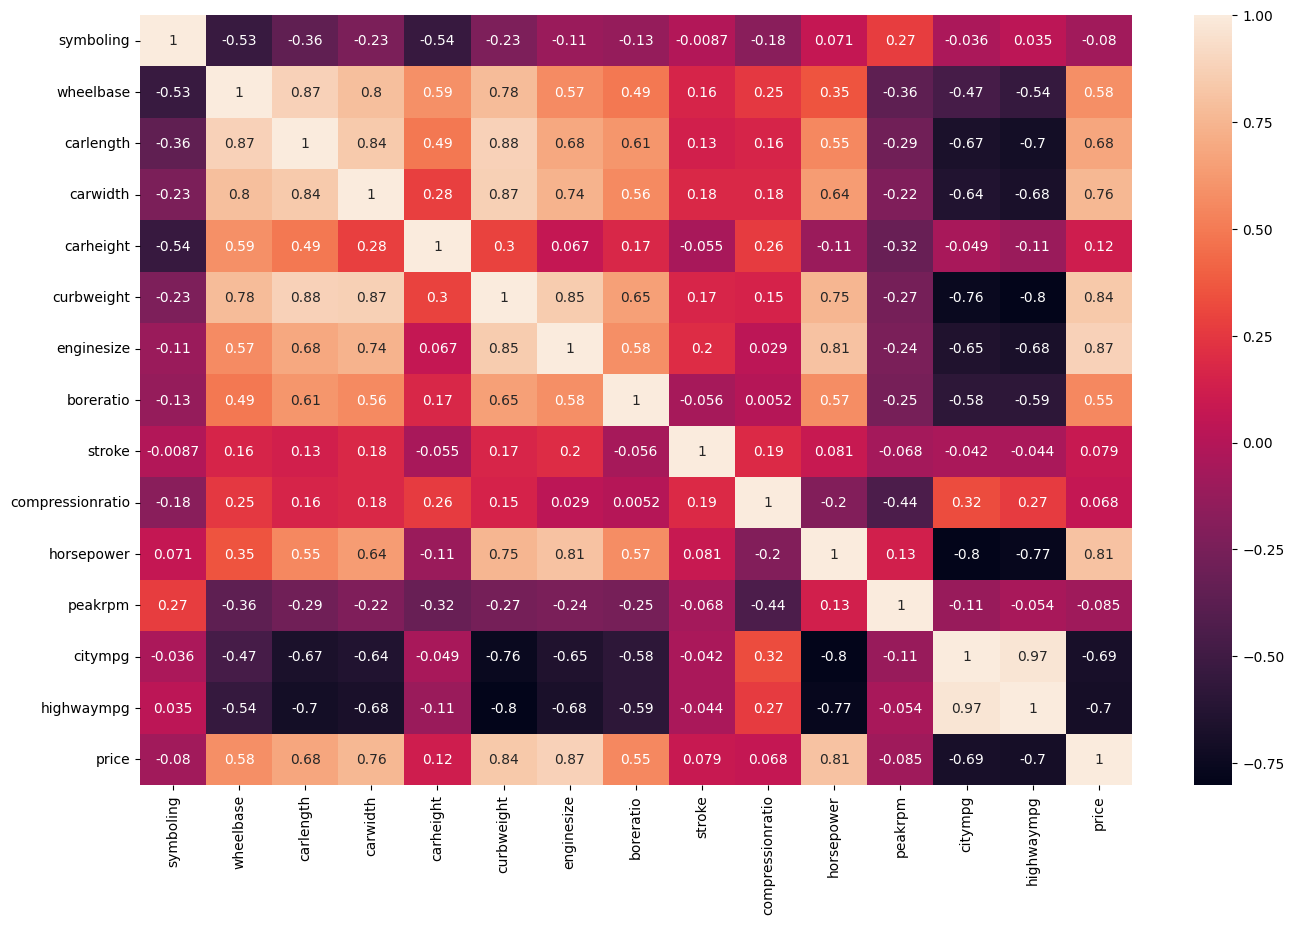

In [15]:
#plot the data
# Assuming df is your DataFrame
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create heatmap of correlation matrix
plt.figure(figsize=(16,10))
ax=sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

<p>Here,we apply feature selection(correlation) and select feature which are more correlate with target value.</p>

In [16]:
x=df[['symboling','fueltype','doornumber','carbody','carheight','stroke','compressionratio','horsepower','peakrpm','Company']]
y=df[['price']]
x.head()

,symboling,fueltype,doornumber,carbody,carheight,stroke,compressionratio,horsepower,peakrpm,Company
0,5,1,1,0,48.8,2.68,9.0,111,5000,1
1,5,1,1,0,48.8,2.68,9.0,111,5000,1
2,3,1,1,2,52.4,3.47,9.0,154,5000,1
3,4,1,0,3,54.3,3.40,10.0,102,5500,2
4,4,1,0,3,54.3,3.40,8.0,115,5500,2


## 5.EDA

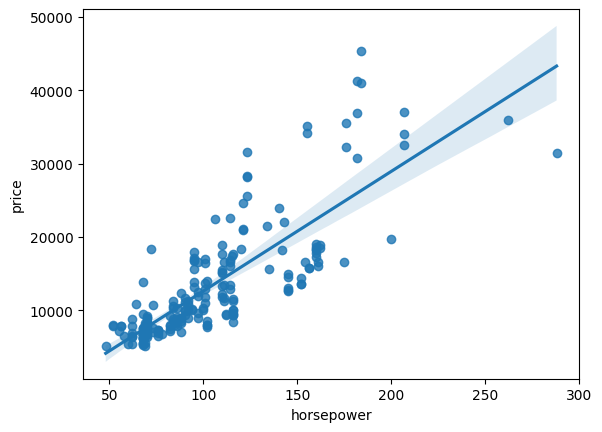

In [77]:
 X = df['horsepower']
 Y = df['price']
sns.regplot(x=X, y=Y)
plt.show()

Store inputs in X & output in Y variable

## 6.Data Splitting

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [15]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)


x_train (164, 10)
x_test (41, 10)
y_train (164, 1)
y_test (41, 1)


## 7.Model Selection & Implimentation(Linear Regression)

In [16]:
clf=LinearRegression()

## 8.Model training

In [17]:
clf.fit(x_train,y_train)

LinearRegression()

In [21]:
# y=mx+c c=intercept
c=clf.intercept_
c

array([-22477.70399506])

In [23]:
# y=mx+c m=slope
m=clf.coef_
m

array([[-2.89163208e+02,  1.62253358e+03, -2.02174014e+03,
        -2.13445855e+03,  5.72272990e+02, -9.01592810e+02,
         5.12027903e+02,  1.70472953e+02, -1.41977142e+00,
        -1.60493103e+02]])

In [25]:
# predicted values using predict()
predicted_train=clf.predict(x_train)
predicted_train

array([[30022.97282014],
       [11428.34230304],
       [ 6888.2135407 ],
       [ 7320.26791771],
       [12542.42658504],
       [19081.4403455 ],
       [15107.0489149 ],
       [17795.9935064 ],
       [ 5788.01650137],
       [ 6431.47886304],
       [26082.55519932],
       [16294.93428416],
       [41727.92221311],
       [ 7367.18777968],
       [12227.58500416],
       [11812.75667494],
       [14018.67976035],
       [ 6033.50180089],
       [18783.9204888 ],
       [ 9740.60041042],
       [ 5757.03686199],
       [ 6582.7550031 ],
       [19129.72197072],
       [19922.0403729 ],
       [17059.70020699],
       [ 5719.07677265],
       [ 4704.33005734],
       [ 8090.41064014],
       [13644.57257298],
       [ 7267.74640504],
       [ 7778.77700051],
       [13720.55120726],
       [13947.21522523],
       [22322.30374074],
       [17459.32523549],
       [11171.21296186],
       [ 4495.58263434],
       [ 9417.86753248],
       [11171.21296186],
       [13571.77947135],


In [26]:
predict = clf.predict(x_test)
predict

array([[18783.9204888 ],
       [ 8612.822124  ],
       [19922.0403729 ],
       [22446.99595477],
       [ 7086.76122994],
       [ 7496.71271429],
       [21264.18052101],
       [21403.2275609 ],
       [15107.0489149 ],
       [13972.60006979],
       [22208.59577925],
       [13524.22868046],
       [11859.87410945],
       [10064.5621351 ],
       [13366.37034778],
       [ 9225.75794599],
       [13106.43411636],
       [ 8966.5229794 ],
       [ 8765.68294527],
       [ 7490.53947805],
       [15934.31124889],
       [19593.45932338],
       [ 6582.7550031 ],
       [24790.10291776],
       [ 4382.86422256],
       [15164.69264752],
       [ 8829.78115538],
       [13843.23520253],
       [13305.67151215],
       [ 7603.25788982],
       [15934.31124889],
       [11543.96049048],
       [25278.02952517],
       [12742.47759818],
       [18783.9204888 ],
       [ 7015.23340421],
       [ 6825.94907326],
       [14253.12747282],
       [12396.6557501 ],
       [15658.68723075],


In [27]:
x_train.iloc[0]

symboling              2.00
fueltype               1.00
doornumber             0.00
carbody                3.00
carheight             56.70
stroke                 3.35
compressionratio       8.00
horsepower           184.00
peakrpm             4500.00
Company                4.00
Name: 73, dtype: float64

In [28]:
predicted_train[0]

array([30022.97282014])

In [29]:
# from x_train consider the value x=5.0 and find out the predicted value using the equation y=mx+c
m*5.0+c

array([[-23923.52003685, -14365.03609862, -32586.40468763,
        -33149.9967465 , -19616.33904424, -26985.66804616,
        -19917.56448226, -21625.33923243, -22484.80285217,
        -23280.16951186]])

In [30]:
y_train.iloc[0]

price    40960.0
Name: 73, dtype: float64

In [31]:
x_test.iloc[1]

symboling              3.00
fueltype               1.00
doornumber             0.00
carbody                3.00
carheight             51.60
stroke                 3.46
compressionratio       8.50
horsepower            88.00
peakrpm             5000.00
Company               12.00
Name: 85, dtype: float64

In [32]:
y_test.iloc[1]

price    6989.0
Name: 85, dtype: float64

## 9.Model Evaluation

In [18]:
clf.score(x_test,y_test)

0.655869627426459

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

#import math
#math.sqrt(mean_squared_error(predict,y_test))

mse=mean_squared_error(y_train,predicted_train)
mse

13543965.631173672

##### Lower values of MSE indicate better model performance, as they imply that the model's predictions are closer to the actual values on average.
##### MSE value of 13543965.631173672 suggests relatively high error

In [36]:
rmse=np.sqrt(mse)
rmse

3680.2127154790487

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, predicted_train)
r2

0.7964880244000678

##### Higher R-squared values indicate better fit of the model to the data. A score of 0.7965 suggests that the linear regression model fits the data very well

R-squared values range from 0 to 1

In [39]:
# lr.score(x_train, y_train) calculates the R-squared score on the training data
# This represents how well the model fits the training data.
clf.score(x_train,y_train)

0.7964880244000678

In [40]:
# lr.score(x_test, y_test) calculates the R-squared score on the test data .
# This represents how well the model generalizes to unseen data.
clf.score(x_test,y_test)

0.655869627426459

##### The score() method returns the R-squared value by default for regression models like linear regression. This value ranges between 0 and 1, where a higher value indicates a better fit of the model to the data.

##### By comparing the R-squared scores on both training and test data, you can assess the model's performance and whether it is overfitting or underfitting. If the R-squared score is significantly higher on the training data compared to the test data, it may indicate overfitting. Conversely, if the scores are similar but low, it may indicate underfitting.

In [42]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,x_train,y_train,cv=5)
scores

array([0.68771301, 0.71748073, 0.83714607, 0.83492556, 0.60144266])

In [43]:
scores.mean()

0.7357416061025066

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


In [19]:
#List of regression algorithms to evaluate
regressors = {
     'Linear Regression': LinearRegression(),
     'Decision Tree Regressor': DecisionTreeRegressor(),
     'Random Forest Regressor': RandomForestRegressor(),
     'Gradient Boosting Regressor': GradientBoostingRegressor(),
     'Support Vector Regressor': SVR()
}

#Train & evaluate each regression algorithm
for name,regressor in regressors.items():
    #train the model
    regressor.fit(x_train,y_train)

    #evaluate the model
    train_score = regressor.score(x_train,y_train)
    test_score = regressor.score(x_test,y_test)

    #print the evaluation results
    print(f"{name}:")
    print(f" Training R^2 Score:{train_score:.4f}")
    print(f" Testing R^2 Score:{test_score:.4f}")
    print("="*50)


Linear Regression:
 Training R^2 Score:0.7821
 Testing R^2 Score:0.7407
Decision Tree Regressor:
 Training R^2 Score:0.9927
 Testing R^2 Score:0.8859


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor:
 Training R^2 Score:0.9706
 Testing R^2 Score:0.8919
Gradient Boosting Regressor:
 Training R^2 Score:0.9830
 Testing R^2 Score:0.9061
Support Vector Regressor:
 Training R^2 Score:-0.1323
 Testing R^2 Score:-0.1597


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
